### Introduction to Time Series Example 2.3:
We study the quarterly beer production in Australia (in megalitres) between March 1956 and June 1994. (The data is available from http://datamarket.com/data/list/?q=provider:tsdl and is provided by the Australian Bureau of Statistics.). The base time unit is hence years and the frequency would be $4$, i.e. one time step corresponds to $3$ months. The start time is 1956 plus one sampling unit and the end time is 1994 plus 2 sampling units.

In [1]:
import numpy as np
import pandas as pd

# Load data
AusBeer = pd.read_csv('./data/AustralianBeer.csv', sep = ";", header = 0)

# Convert TravelDate to Datetime Format
AusBeer["Quarter"] = pd.to_datetime(AusBeer["Quarter"])
# Create pandas DateTimeIndex
dtindex = pd.DatetimeIndex(data=AusBeer["Quarter"], freq='infer')
# Set as Index
AusBeer.set_index(dtindex, inplace=True)
AusBeer.drop("Quarter", axis=1, inplace=True)

# Print head
print(AusBeer.head(3))

# Describe Data
print("\n", AusBeer.describe())

            megalitres
Quarter               
1956-01-01       284.4
1956-04-01       212.8
1956-07-01       226.9

        megalitres
count  154.000000
mean   408.267532
std     97.598588
min    212.800000
25%    325.425000
50%    427.450000
75%    466.950000
max    600.000000


The `describe()` function shows the minimum, the first quartile, the median, the second quartile and the maximum of the time series. This is called the *five-number-summary* of a data set. In addition, the mean is also computed. 

We now extract a subset of this time series. We choose the time window in between September 1980 and March 1990. The plot shows a seasonal behaviour where we have peaks in the last quarter of each year which corresponds to the Australian summer. Moreover, a long-term trend of production increase is also visible which was strongest between 1960 and the mid 70s and stagnates since.

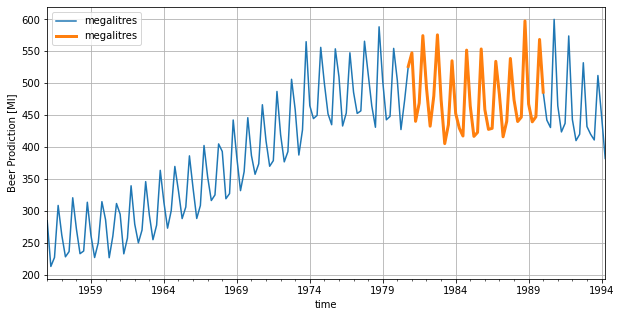

In [2]:
import matplotlib.pyplot as plt

# Plot
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
# All data
AusBeer.plot(ax=ax)
# Subset in red
AusBeer.loc["1980-9" : "1990-3"].plot(ax=ax, linewidth=3)

ax.set_xlabel("time")
ax.set_ylabel("Beer Prodiction [Ml]")
ax.grid()

plt.show()